### 챌린지
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.
- 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.
- 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.

3. 다양하고 재미있는 결과 시각화를 시도하였다.
- matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.

In [1]:
# 필수 라이브러리 설치
! pip install cmake
! pip install dlib
! pip install face_recognition --user

You should consider upgrading via the '/home/aiffel/anaconda3/envs/aiffel/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/aiffel/anaconda3/envs/aiffel/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/aiffel/anaconda3/envs/aiffel/bin/python3 -m pip install --upgrade pip' command.


In [57]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3


#### 사진모으기(데이터 구축)
    - 내 사진 찍기(2장 이상)
    - 비교할 연예인 사진 모으기
        - 많이 모을수록 닮은 연예인을 찾을 가능성이 높아짐


#### 얼굴 영역 자르기
    - get_gropped_face(image_file) 로 이미지 자르기
    - Image.fromarray >>> PIL image로 변환한 뒤 저장 

file_list: ['돈스파이크.jpg', '한석규.jpg', '이용진.jpg', '제이홉.jpg', '찬열.jpeg', '스윙스.jpeg', '박서준.jpeg', '지민(BTS).jpg', '윤아.jpg', '권현빈.jpg', '박신양.png', '무라니시.png', '류승룡.jpeg', '트와이스사나.jpg', '효정.jpg', '강민경.jpg', '최무성.jpg', '철면수심.jpg', '박희순.jpg', '박찬욱.jpeg', '지디.jpg', '이효리.jpg', '류현진.jpg', '이승환.jpg', '슬기.jpg', '하현우.jpg', '개코.jpeg', '박성호.jpg', '조승우.jpeg', 'clinton.jpeg', '박찬호.jpg', '이범수.jpeg', '하승진.jpg', '손예진.jpeg', '한효주.jpg', '서강준.jpg', '딕헌터.jpeg', 'trump.jpg', 'biden.jpg', '차승원.jpg', '수지.jpg', '서현진.jpg', '피어스 브로스넌.jpg', '아린.jpg', '이진호.jpeg', '리사.jpg', '이정재.jpeg', '마크 러팔로.jpeg', '도아.jpeg', '잭 갤리퍼내키스.jpg', '저스틴 존슨.jpeg', '미미.jpg', '트와이스미나.jpg', '최민식.jpg', '김희철.jpg', '온앤오프와이엇.jpg', '세훈.jpg', '정준하.jpg', '도지한.jpg', '택연.jpg', '산들.jpeg', '아이린.jpeg', '리암 니슨.png', '김종서.jpg', '권태원.jpeg', 'RM.jpg', '크리스탈.jpg', '노무현.jpeg', '하정우.jpg', '신태용.jpg', '정우성.jpeg', '태연.jpg', '이동휘.jpg', '황정민.jpg', '강미나.jpg', '박보영.jpg', '김영삼.jpeg', '숀 코네리.jpg', '김고은.jpeg', '이승철.jpeg', '트와이스다현.jpeg', '온앤오프효진.jpg', '제이콥 배털론.jpg', '방시혁.jpeg

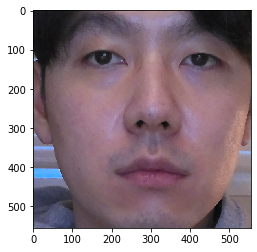

In [35]:
import face_recognition
import os
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

#이미지 파일 경로를 파라미터로 넘겨 얼굴 영역만 잘라주는 함수
def get_gropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face



#이미지 파일 경로의 파일 목록을 리스트에 담기
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'

#os.path.join()사용시 폴더는 제외하는 방법을 몰라 그냥 단일 폴더로 변경함
#star_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity'

PIL_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/PIL'

#파일목록 리스트 생성
file_list = os.listdir(dir_path)
PIL_file_list = os.listdir(PIL_dir_path)

print ("file_list: {}\n".format(file_list))
print ("PIL_file_list: {}".format(PIL_file_list))

#크롭 테스트
myface1 = get_gropped_face(os.getenv('HOME')+'/aiffel/face_embedding/images/못난이.jpg')
myface2 = get_gropped_face(os.getenv('HOME')+'/aiffel/face_embedding/images/멍청이.jpg')


                        
# 이미지에서 얼굴영역만 잘라낸 cropped_face 출력
plt.imshow(myface1)  

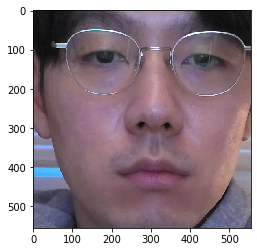

In [36]:
plt.imshow(myface2) 

#### 얼굴 영역의 임베딩 추출하기
    - face_recognition 이용하여 이미지 불러와 임베딩 추출
    - def get_face_embedding(face) :
        - 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
    - def get_face_embedding_dict(dir_path) : 
        - 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [37]:
image_file = os.path.join(dir_path, '못난이.jpg')
face = get_gropped_face(image_file)
#얼굴 영역을 가지고 얼굴 임베딩 벡터 구하기
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(embedding)

for index, value in enumerate(embedding[0],start=1):
        print(index, value)

[array([-0.07372059,  0.03939187,  0.01164056, -0.01798536, -0.06170138,
       -0.02444708, -0.03418703, -0.09974205,  0.0857883 , -0.12082682,
        0.22365166, -0.09081978, -0.20068772, -0.1232022 , -0.03987833,
        0.18029681, -0.15408252, -0.14270216, -0.05784933,  0.038705  ,
        0.14709605,  0.06723459, -0.0101103 ,  0.03825022, -0.08889031,
       -0.31532884, -0.12955128, -0.08796051,  0.04008088, -0.06723171,
       -0.09381235, -0.01336165, -0.22295238, -0.07853817,  0.05212747,
        0.05483725, -0.05722609, -0.0799656 ,  0.19542976,  0.03715271,
       -0.22585025,  0.0942764 ,  0.02094297,  0.25072557,  0.20883788,
        0.05264821,  0.0081245 , -0.17002836,  0.10780476, -0.13723208,
        0.08231868,  0.18687567,  0.11044103,  0.11582208, -0.01728885,
       -0.09548222,  0.0450059 ,  0.07561701, -0.13712242,  0.0456082 ,
        0.14201851, -0.05823235,  0.01953223, -0.08288946,  0.15604647,
       -0.05388294, -0.12004087, -0.23372006,  0.11416292, -0.1

In [41]:
#폴더 경로의 모든 파일을 불러와 임베딩해서 딕셔너리 구조에 담기{사람이름 : 임베딩 벡터}
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [42]:
#오바마 사진을 가지고 임베딩하여 딕셔너리에 넣기테스트
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['obama']

array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
       -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
        0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
        0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
        0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
       -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
       -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
       -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
       -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
        0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
        0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
       -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
        0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
        0.10299795, -0.12437531, -0.0490516 ,  0.12252682, -0.02

In [43]:
#두 이미지 사이의 거리값 반환 함수선언
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('못난이', 'trump')

0.8333754483880684

In [45]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, 
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때
#trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.
print(sort_key_func)

<function get_sort_key_func.<locals>.get_distance_from_name1 at 0x7fbcecb3db00>


#### 모은 연예인들과 비교하기
    -자신의 얼굴 사진 추출 임베딩 벡터와 연예인 사진들의 임베딩 벡터간 거리를 비교
    -그 값이 가장 작다면 가장 닮은 연예인 
    -get_nearest_face(name, top=5) 함수 응용하기
    

In [46]:
#람다식을 통해 이미지 딕셔너리를 오츰차순 정렬하여 입력 인자와 비교
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
          0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
          0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
          0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
         -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
         -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
          0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
          0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
         -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
         -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
         -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
         -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
          0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
          0.05921567, -0.06

In [51]:
#입력값에 대하여 비교하여 닮은정도 리턴

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [52]:
get_nearest_face("못난이")#여기서 멍청이는 나의 또다른 사진이다 

순위 1 : 이름(멍청이), 거리(0.3689172723894527)
순위 2 : 이름(RM), 거리(0.4798359420577881)
순위 3 : 이름(김C), 거리(0.5824818617365275)
순위 4 : 이름(지민(BTS)), 거리(0.604295747325852)
순위 5 : 이름(clinton), 거리(0.8232653519917199)


#### 다양한 시각화 시도하기
    - tkinter , flask 를 활용하여 닮은꼴을 찾을 이미지를 업로드 한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현 하는것도 가능할것
    
    